https://dataprofessor.beehiiv.com/p/how-to-tune-hyperparameters-of-machine-learning-models

 Generating the Synthetic Dataset

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=200, n_classes=2, n_features=10, n_redundant=0, random_state=1)

Examine Dataset Dimension
Let’s now examine the dimension of the dataset

In [2]:
X.shape, Y.shape

((200, 10), (200,))

Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Examining the Dimension of Training Set

In [4]:
X_test.shape, Y_test.shape

((40, 10), (40,))

Building a Baseline Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=3, n_estimators=20)

Training the Random Forest Model
Now, we will be applying the random forest classifier to build the classification model using the rf.fit() function on the training data (e.g. X_train and Y_train).

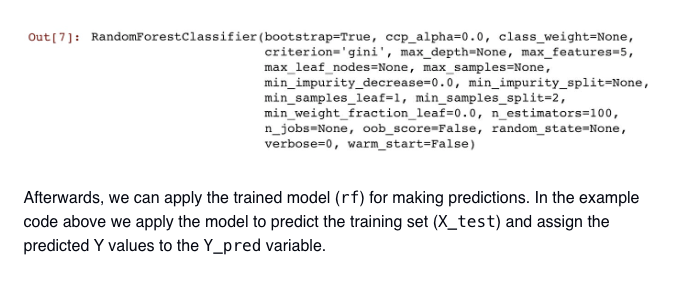

In [22]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

Evaluating the Model Performance

In [24]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score

ac = accuracy_score(Y_pred, Y_test)
mcc = matthews_corrcoef(Y_pred, Y_test)
roc_auc = roc_auc_score(Y_pred, Y_test)

print("accuracy_score: ", ac, "matthews_corrcoef: ", mcc, "roc_auc_score: ", roc_auc)

accuracy_score:  0.85 matthews_corrcoef:  0.7171717171717171 roc_auc_score:  0.8585858585858586


Performance Metrics

In [33]:
from sklearn.metrics import get_scorer_names

# Retrieve and sort the list of available scorers
scorers = sorted(get_scorer_names())
scorers


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

Hyperparameter Tuning

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.model_selection import StratifiedKFold


max_features_range = np.arange(3,12,1)
n_estimators_range = np.arange(50,200,10)


param_grid = {
    'max_features': max_features_range,
    'n_estimators': n_estimators_range,
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 80} with a score of 0.92


/opt/anaconda3/envs/torch/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [6]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=10,
                       n_estimators=80)

In [8]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, roc_auc_score

Y_pred = grid.best_estimator_.predict(X_test)


ac = accuracy_score(Y_pred, Y_test)
mcc = matthews_corrcoef(Y_pred, Y_test)
roc_auc = roc_auc_score(Y_pred, Y_test)

print("accuracy_score: ", ac, "matthews_corrcoef: ", mcc, "roc_auc_score: ", roc_auc)

accuracy_score:  0.925 matthews_corrcoef:  0.8510644963469901 roc_auc_score:  0.9249999999999999
